# 연령별 취업자수 관계

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr></hr>
  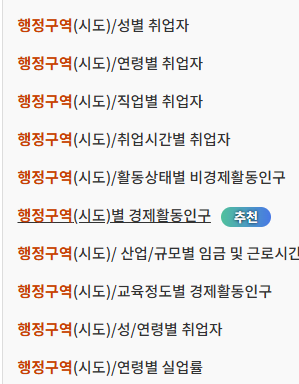 
  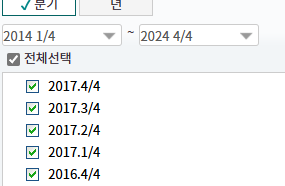 

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import pandas as pd


In [ ]:
fontlist = fm.findSystemFonts(fontpaths=None, fontext="ttf")
fontlist
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc("font", family=font_name)

In [ ]:
ori = pd.read_csv("./ref/행정구역시도성연령별취업자.csv", encoding="EUC-KR")
ori.head()

In [18]:
ex_data = ori.copy() #원복 복사
ex_data.columns = ["resion","year","age","gender","value"] #컬럼 이름 변경
ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"] = ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"].replace("-",0) # 세종시의 값 수정(17년도 전 값이 -로 되어있음)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [19]:
ex_data["value"] = ex_data["value"].astype(int) # 게산하기 위해 int로 수정
ex1_data = ex_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
ex1_data

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295
5,2015.2/4,26114
6,2015.3/4,26214
7,2015.4/4,26148
8,2016.1/4,25502
9,2016.2/4,26320


In [ ]:
ax = ex1_data.plot(x="year", y="total",figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data["year"],rotation=45)
plt.show()

In [ ]:
gender_data = ex_data.set_index("gender")
#male_data = gender_data.loc["남자","value"].reset_index()
#female_data = gender_data.loc["여자","value"].reset_index()
male_data = gender_data.drop("여자",axis=0)
female_data = gender_data.drop("남자",axis=0)

In [ ]:
male_data["value"] = male_data["value"].astype(int) # 게산하기 위해 int로 수정
male_data = male_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
male_data

In [ ]:
female_data["value"] = female_data["value"].astype(int) # 게산하기 위해 int로 수정
female_data = female_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
female_data

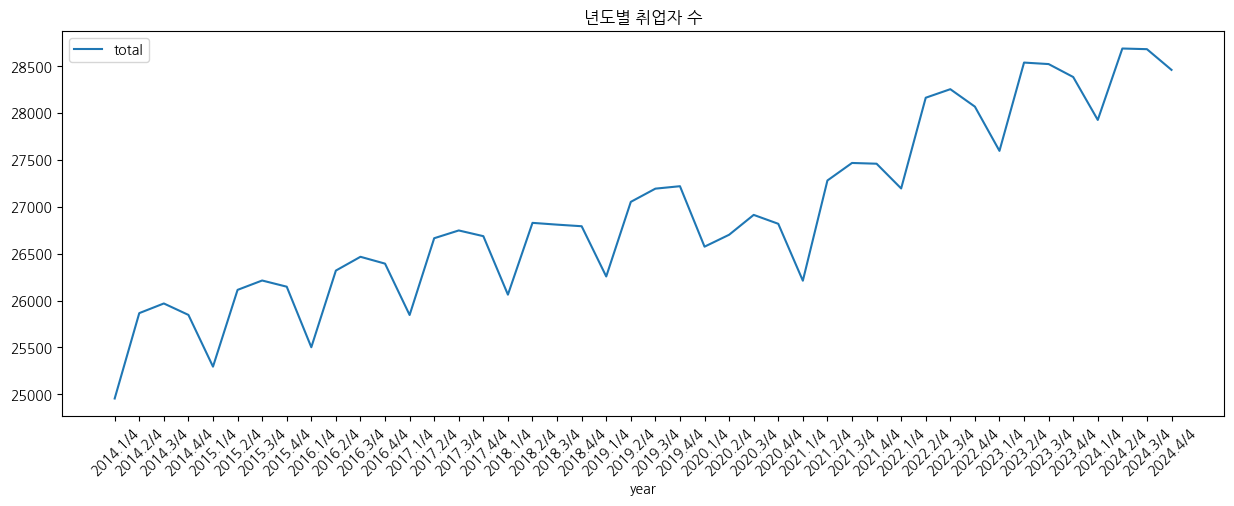

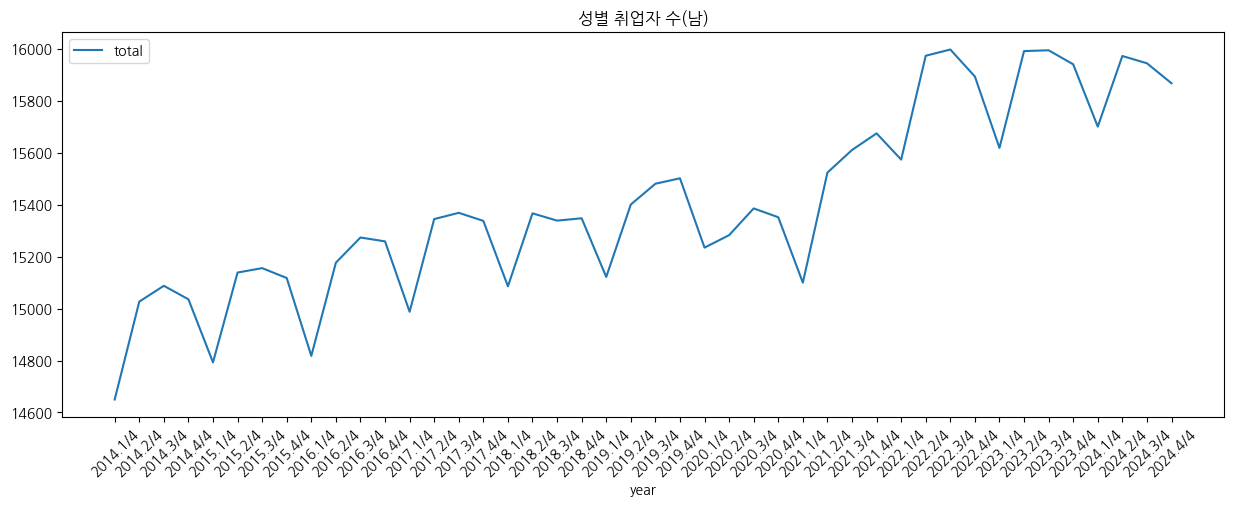

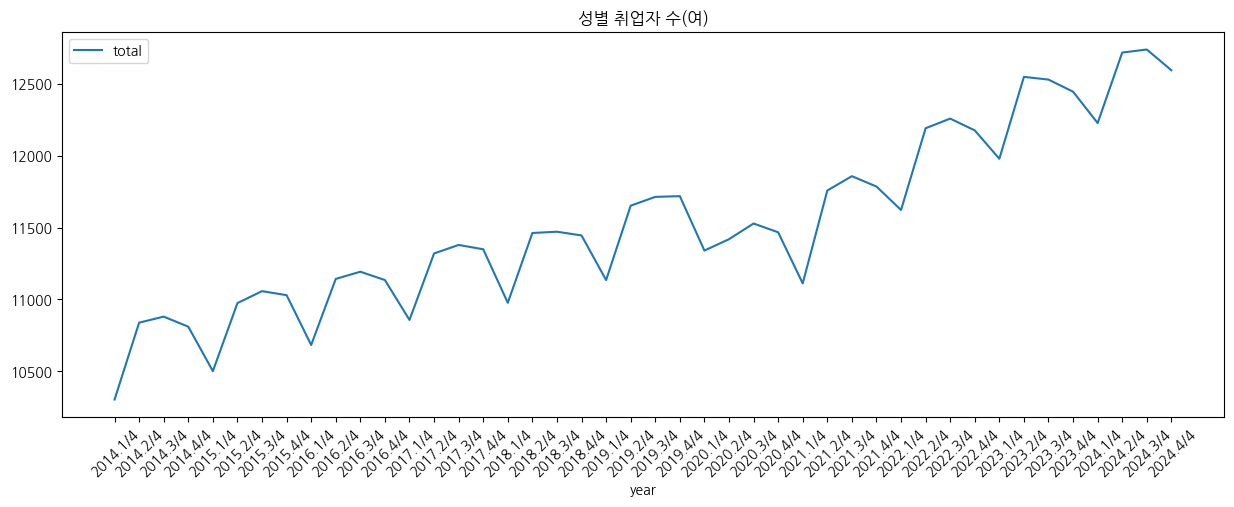

In [17]:
#내가 한거
ax1 = ex1_data.plot(x="year", y="total",figsize=(15,5), title="년도별 취업자 수")
ax1.set_xticks(range(len(ex1_data)))
ax1.set_xticklabels(ex1_data["year"],rotation=45)

ax2 = male_data.plot(x="year", y="total",figsize=(15,5), title="성별 취업자 수(남)")
ax2.set_xticks(range(len(male_data)))
ax2.set_xticklabels(male_data["year"],rotation=45)

ax3 = female_data.plot(x="year", y="total",figsize=(15,5), title="성별 취업자 수(여)")
ax3.set_xticks(range(len(female_data)))
ax3.set_xticklabels(female_data["year"],rotation=45)

plt.show()

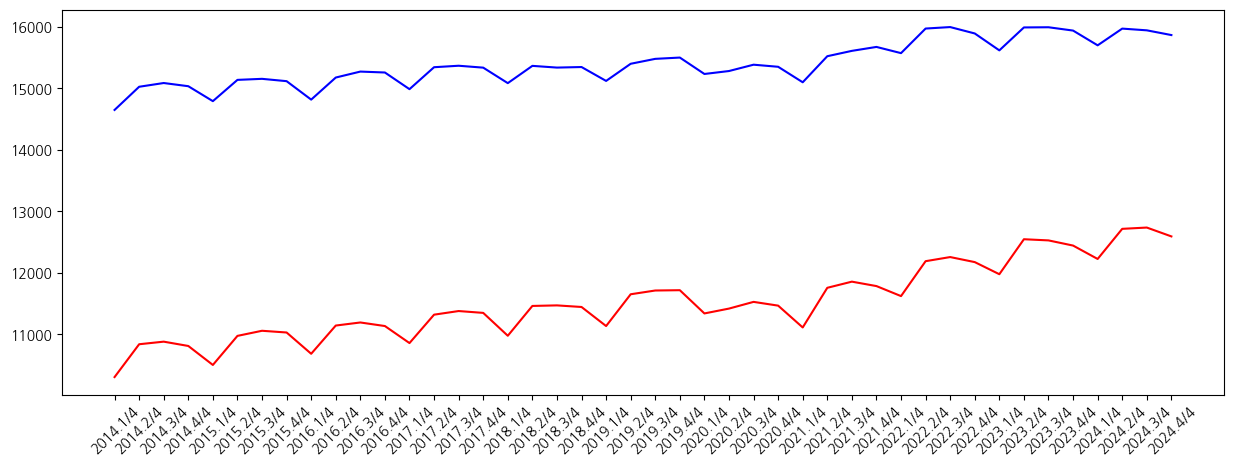

In [15]:
plt.figure(figsize=(15,5))
plt.plot(male_data["year"],male_data["total"], color="blue")
plt.plot(female_data["year"],female_data["total"], color="red")
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data["year"],rotation=45)
plt.show()